# Problem statement :
Build a recommender system by using cosine simillarties score.

# Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

import warnings
warnings.filterwarnings('ignore')

In [2]:
Ree = pd.read_csv("C:/Users/pprat/Downloads/book (4).csv",encoding='latin-1')

In [3]:
Ree.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [4]:
Ree.columns

Index(['Unnamed: 0', 'User.ID', 'Book.Title', 'Book.Rating'], dtype='object')

# Data Understanding

In [5]:
Ree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10000 non-null  int64 
 1   User.ID      10000 non-null  int64 
 2   Book.Title   10000 non-null  object
 3   Book.Rating  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [6]:
Ree.isna().sum()

Unnamed: 0     0
User.ID        0
Book.Title     0
Book.Rating    0
dtype: int64

In [7]:
Ree.shape

(10000, 4)

In [8]:
Ree=Ree.drop("Unnamed: 0",axis=1)

In [9]:
Ree

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [10]:
Ree.drop_duplicates(subset=["User.ID"],inplace=True)

In [11]:
Ree

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
5,276744,The Kitchen God's Wife,7
...,...,...,...
9987,162107,What's Bred in the Bone,7
9988,162109,The Flower in the Skull,10
9989,162113,The Cape Ann (Contemporary American Fiction),8
9990,162121,The Cloister Walk,7


In [12]:
Ree['Book.Rating'].describe()


count    2182.000000
mean        7.458295
std         1.848169
min         1.000000
25%         6.000000
50%         8.000000
75%         9.000000
max        10.000000
Name: Book.Rating, dtype: float64

In [13]:
Ree1 = Ree.pivot_table(index='User.ID',columns='Book.Title',values='Book.Rating') 
Ree1.head()


Book.Title,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,101 Bright Ideas: Esl Activities for All Ages,101 Dalmatians,11th Hour,13 99 Euros,"20,001 Names for Baby",2001 Spanish and English Idioms/2001 Modismos Espanoles E Ingleses: 2001 Modismos Espanoles E Ingleses,2061: Odyssey Three,253,...,Your Oasis on Flame Lake,"Yours, Mine And ...Ours (Silhouette Special Edition, No 682)",Yukon Ho!,Yuwipi: Vision and Experience in Oglala Ritual,Zeit im Wind.,Zen in the Art of Archery (Vintage Spiritual Classics),Zlateh the Goat and Other Stories,Zodiac: The Eco-Thriller,Zombies of the Gene Pool,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book)
User.ID,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
Ree1.fillna(0,inplace=True)

In [15]:
Ree1.head()

Book.Title,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,101 Bright Ideas: Esl Activities for All Ages,101 Dalmatians,11th Hour,13 99 Euros,"20,001 Names for Baby",2001 Spanish and English Idioms/2001 Modismos Espanoles E Ingleses: 2001 Modismos Espanoles E Ingleses,2061: Odyssey Three,253,...,Your Oasis on Flame Lake,"Yours, Mine And ...Ours (Silhouette Special Edition, No 682)",Yukon Ho!,Yuwipi: Vision and Experience in Oglala Ritual,Zeit im Wind.,Zen in the Art of Archery (Vintage Spiritual Classics),Zlateh the Goat and Other Stories,Zodiac: The Eco-Thriller,Zombies of the Gene Pool,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book)
User.ID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Visualization

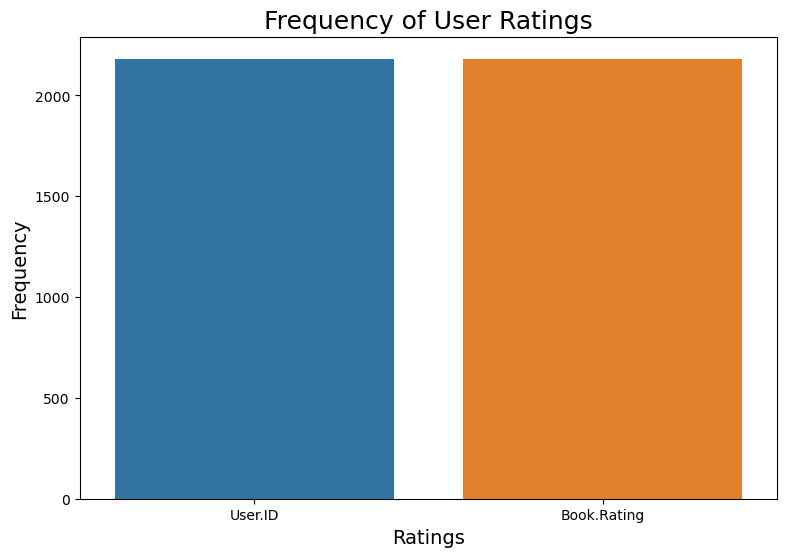

In [17]:
plt.figure(figsize=(9,6))
sns.countplot(Ree)
plt.title("Frequency of User Ratings", fontsize= 18)
plt.xlabel("Ratings", fontsize= 14)
plt.ylabel("Frequency", fontsize= 14)
plt.show()

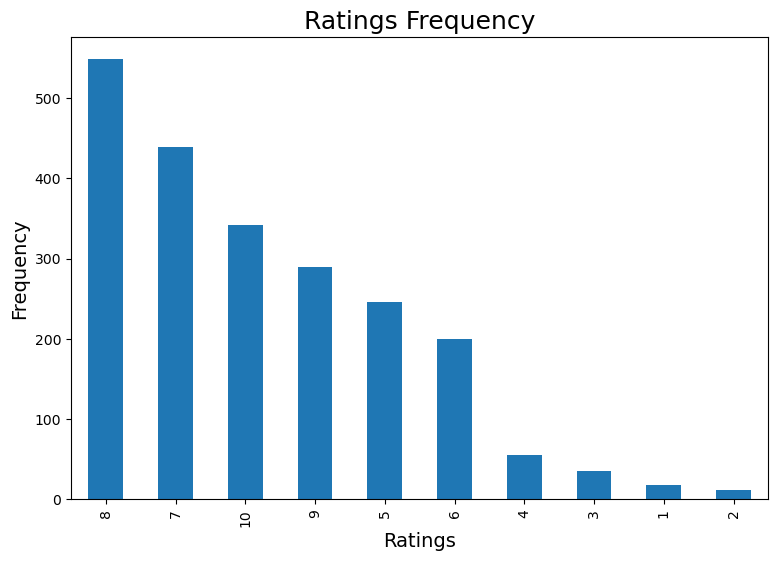

In [18]:
plt.figure(figsize=(9,6))
Ree['Book.Rating'].value_counts().plot(kind='bar')
plt.title('Ratings Frequency', fontsize = 18)
plt.xlabel("Ratings", fontsize= 14)
plt.ylabel("Frequency", fontsize= 14);

# Observations:
Most Frequent Ratings by Users are: 8, 7 and 10

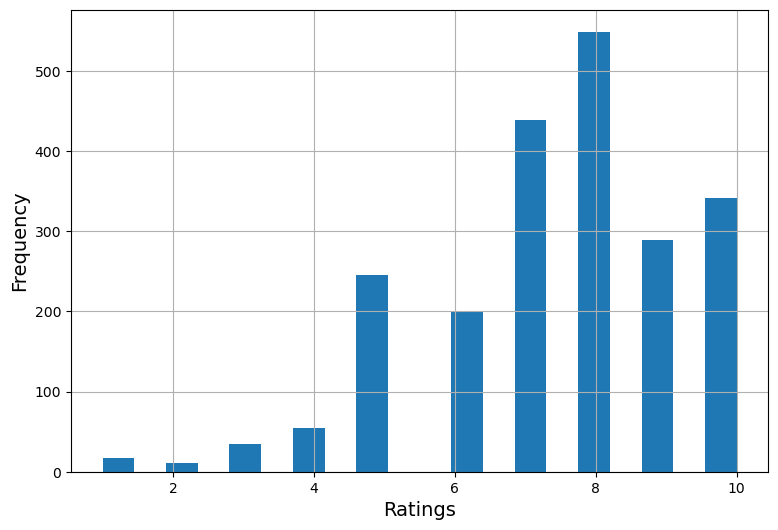

In [20]:
plt.figure(figsize=(9,6))
Ree['Book.Rating'].hist(bins=20)
plt.xlabel("Ratings", fontsize= 14)
plt.ylabel("Frequency", fontsize= 14);

In [21]:
top_books = Ree['Book.Title'].value_counts().head(10)
top_books.index

Index(['The Wind in the Willows', 'The Silmarillion',
       'Five Quarters of the Orange', 'Tiger Prince', 'The Beach House',
       'A Bend in the Road', 'Shock', 'Stardust', 'Vanished', 'Icebound'],
      dtype='object')

In [22]:
#Cosine similarity calculate

In [24]:
sim = 1 - pairwise_distances( Ree1.values,metric='cosine')


In [25]:
sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [26]:
sim = pd.DataFrame(sim)

In [27]:
sim

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Creating Pivot Table

In [28]:

user = Ree.pivot_table(index='User.ID',columns='Book.Title',values='Book.Rating') 
user.head()


Book.Title,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,101 Bright Ideas: Esl Activities for All Ages,101 Dalmatians,11th Hour,13 99 Euros,"20,001 Names for Baby",2001 Spanish and English Idioms/2001 Modismos Espanoles E Ingleses: 2001 Modismos Espanoles E Ingleses,2061: Odyssey Three,253,...,Your Oasis on Flame Lake,"Yours, Mine And ...Ours (Silhouette Special Edition, No 682)",Yukon Ho!,Yuwipi: Vision and Experience in Oglala Ritual,Zeit im Wind.,Zen in the Art of Archery (Vintage Spiritual Classics),Zlateh the Goat and Other Stories,Zodiac: The Eco-Thriller,Zombies of the Gene Pool,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book)
User.ID,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
user.fillna(0,inplace=True)
user

Book.Title,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,101 Bright Ideas: Esl Activities for All Ages,101 Dalmatians,11th Hour,13 99 Euros,"20,001 Names for Baby",2001 Spanish and English Idioms/2001 Modismos Espanoles E Ingleses: 2001 Modismos Espanoles E Ingleses,2061: Odyssey Three,253,...,Your Oasis on Flame Lake,"Yours, Mine And ...Ours (Silhouette Special Edition, No 682)",Yukon Ho!,Yuwipi: Vision and Experience in Oglala Ritual,Zeit im Wind.,Zen in the Art of Archery (Vintage Spiritual Classics),Zlateh the Goat and Other Stories,Zodiac: The Eco-Thriller,Zombies of the Gene Pool,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book)
User.ID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
user= 1 - pairwise_distances(sim.values,metric='cosine')
user

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [32]:
np.fill_diagonal(user,0)

In [33]:
user

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Most Similar Users


In [58]:
sim.idxmax(axis=1)


0          0
1          1
2          2
3          3
4          4
        ... 
2177    2177
2178    2178
2179    2179
2180    2180
2181    2181
Length: 2182, dtype: int64

In [59]:
Ree[(Ree['User.ID']==8) | (Ree['User.ID']==14)]


,User.ID,Book.Title,Book.Rating
2399,8,Ancient Celtic Romances,5
2409,14,COPS,5


In [60]:
# extract the books which userId 162107 & 276726 have watched
Ree[(Ree['User.ID']==162107) | (Ree['User.ID']==276726)]

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
9987,162107,What's Bred in the Bone,7


In [61]:
# extract the books which userId 276729 & 276726 have watched
Ree[(Ree['User.ID']==276729) | (Ree['User.ID']==276726)]


,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3


In [62]:
user_1=Ree[(Ree['User.ID']==276729)]
user_2=Ree[(Ree['User.ID']==276726)]

In [63]:
user_1['Book.Title']


1    Clara Callan
Name: Book.Title, dtype: object

In [64]:
user_1['Book.Title']


1    Clara Callan
Name: Book.Title, dtype: object

In [65]:
pd.merge(user_1,user_2,on='Book.Title',how='outer')


,User.ID_x,Book.Title,Book.Rating_x,User.ID_y,Book.Rating_y
0,276729.0,Clara Callan,3.0,NaN,NaN
1,NaN,Classical Mythology,NaN,276726.0,5.0
